## Faezeh Yazdi Capstone Project - Food Recomendation System

## Notebook : Review Data cleaning
This notebook aims to clean the second dataset, investigate data and do EDA.


- Reviews <br>
The reviews dataset contains 1,401,982 reviews from 271,907 different users. This dataset provides information about the author, rating, review text, and more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("Raw Data/reviews.parquet")
#df = pd.read_parquet("Raw Data/reviews.parquet")

In [3]:
# dataset size
df.shape

(1401982, 8)

In [4]:
df.head(2)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00


## Duplicates

**Duplicate Rows**
Lets check if we have any duplicate rows in our data. 
First we set the ReviewId as the index, to check the duplication other columns rather than ReviewId.

In [5]:
# set the index as ReviewId
df.set_index("ReviewId")

,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
ReviewId,,,,,,,
2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00
...,...,...,...,...,...,...,...
2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27 23:57:54+00:00,2020-12-27 23:57:54+00:00
2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28 00:44:42+00:00,2020-12-28 00:44:42+00:00
2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28 01:04:43+00:00,2020-12-28 01:04:43+00:00


In [6]:
#number of duplicated rows
df.duplicated().sum()

0

Fortunately there is no duplicated information in our table. Lets check the columns information.<br>
<br>
**Duplicate columns**<br>
It seems that DateModified and DateSubmitted columns have similar information. lets check if they are all the same.

In [7]:
#any row exist that DateModified and DateSubmitted are not the same
df[df['DateModified'] != df['DateSubmitted']]

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified


DateModified and DateSubmitted are exactly having the same information. so we can drop one of them.

In [8]:
#drop DateModified
df = df.drop(columns = 'DateModified')

#sanity check
df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00


---
# Missing Values
Lets see if there is any missing value in our dataset.

In [9]:
df.isna().sum()

ReviewId         0
RecipeId         0
AuthorId         0
AuthorName       0
Rating           0
Review           0
DateSubmitted    0
dtype: int64

Fortunately, there is no missing value.:)

---
# Data Types
Next step would be chicking for data types to make sure everything is in the right format.

In [10]:
#each column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int32(4), object(2)
memory usage: 53.5+ MB


In [11]:
# values of rating
df["Rating"].unique()

array([5, 4, 2, 0, 1, 3], dtype=int32)

All the columns are in the right format.

---
# EDA and Distributions
In this step there are three main column that we want to investigate. First is submitted date, then check how data is distributed among different authors, and finally Rating distribution.

In [12]:
#plt.figure()
#sns.pairplot(data=df, corner=True)
#plt.yscale('log')
#plt.show()

# pair plot does not make much sense since we have only rating column as numeric column.

### Submitted Date

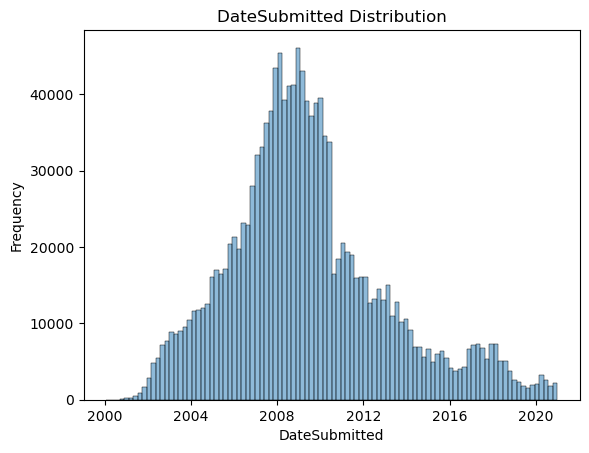

In [13]:
plt.figure()

sns.histplot(df['DateSubmitted'],bins=100, alpha=0.5)
plt.title("DateSubmitted Distribution")
plt.ylabel("Frequency")
plt.xlabel("DateSubmitted")
plt.show()

Most of the reviews has been writen between 2006 and 2010. It can be because that the food.com website was more popular at that time and its popularity decreased over time.

### Authors

In [14]:
#total number of authors
len(df["AuthorId"].unique())

271907

In [15]:
df["AuthorId"].value_counts(normalize=True)*100

424680        0.630679
37449         0.471119
383346        0.387879
128473        0.334740
169430        0.327108
                ...   
1701969       0.000071
1585419       0.000071
1704446       0.000071
1417548       0.000071
2002812127    0.000071
Name: AuthorId, Length: 271907, dtype: float64

The top author in terms of reviews own about 0.6 percent the dataset.

In [16]:
# distribution of reveiw per authors.
df["AuthorId"].value_counts().describe()

count    271907.000000
mean          5.156109
std          53.468238
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        8842.000000
Name: AuthorId, dtype: float64

Most of the authers have 1 or two reviews, however there are some authors that have written many reviews. This is important to have in mind for our model, because the model prediction would lean to those people ideas. On the other hand, understanding the people's preferences from just one or two reviews is very hard.
lets also see the distribution visualy.

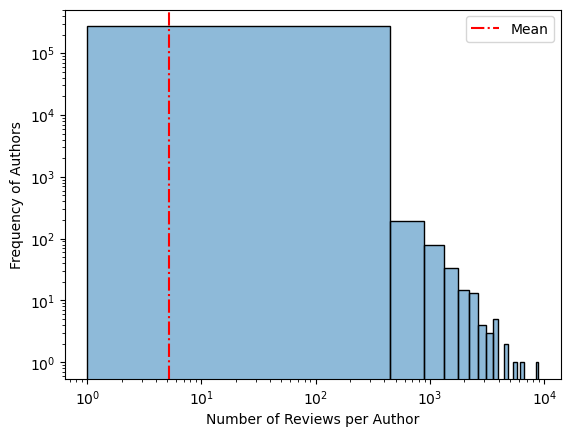

In [17]:
#each author owns how many percent of reviews.
plt.figure()
sns.histplot(df["AuthorId"].value_counts().values, bins=20,alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Frequency of Authors')
plt.xlabel('Number of Reviews per Author')
#plt.title('Review Percentage per Author Distribution')
plt.axvline(df["AuthorId"].value_counts().values.mean(), c='r', linestyle='-.',label='Mean')
plt.legend()
plt.show()

An assumption for the reason for the outlier in number of reviews is that maybe there is bot generating reviews. because it's impossible for a human to right 8000 reviews. however we are not sure and we keep using them. 

In [18]:
# number of reviews for each pair of author and recipe
df.groupby(["AuthorId","RecipeId"])["ReviewId"].count().describe()

count    1401982.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: ReviewId, dtype: float64

we just have one and only one review for each recipe author pair. that means any author can just write a review for a recipe once.

## Rating

Lets check how our data distributed in different ratings.

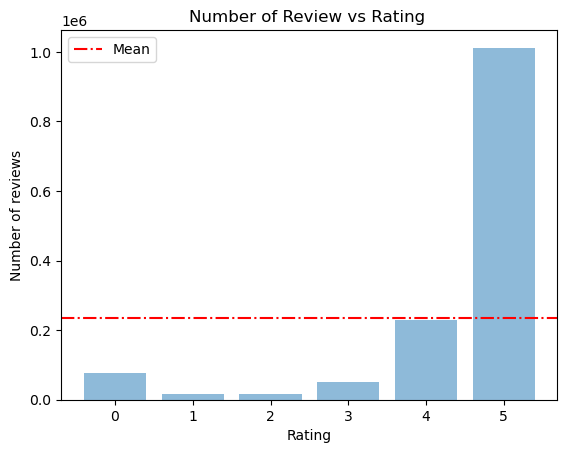

In [19]:
plt.figure()
plt.bar(df["Rating"].value_counts().index, df["Rating"].value_counts().values, alpha=0.5)
plt.ylabel('Number of reviews')
plt.xlabel('Rating')
plt.title('Number of Review vs Rating ')
plt.axhline(df["Rating"].value_counts().values.mean(), c='r', linestyle='-.',label='Mean')
plt.legend()
plt.show()

Reviews is not normally distributed for different ratings. we have to keep that mind and deal with it before modeling because it may cause biases.

---
## Column names

As we may want to merge this table to the recipe table, we want to change the column names to clarify them while we dont want to add a prefix to all of them.

In [20]:
df.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted'],
      dtype='object')

In [21]:
#change some of column names
df.rename(columns={'AuthorId': 'Review_AuthorId', 'AuthorName': 'Review_AuthorName','DateSubmitted':'Review_DateSubmitted','Rating':'Review_Rating'}, inplace=True)

#sanity check
df.head()

,ReviewId,RecipeId,Review_AuthorId,Review_AuthorName,Review_Rating,Review,Review_DateSubmitted
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00


### Save
Finaly lets save our cleaned data

In [22]:
df.to_parquet('Transformed Data/ cleanedReviewdf.parquet', index=False)

### Slice
Lets slice our data to have more managable amount of data.

First we filter the reviews which are about the recipes that we have filtered. And then we filter for the authors that at least have 20 reviews. The reason for second action is that in user item filtering recommendation system, we should have enough information of our user to be able to compare with other users and predict.

In [23]:
#importing final recipe dataset
df_HighReviwedRecipes = pd.read_parquet("Transformed Data/ Cleaned-Sampled-Recipes.parquet")

In [24]:
# reviews for the choosen recipes
df_rev_small = df[df['RecipeId'].isin(df_HighReviwedRecipes['RecipeId'].values)]

#sanity check
df_rev_small.shape

(553665, 7)

The dataset has reduced to 553665 rows. lets filter users.

In [25]:
df_rev_small.head()

,ReviewId,RecipeId,Review_AuthorId,Review_AuthorName,Review_Rating,Review,Review_DateSubmitted
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00
6,19,13307,2046,Gay Gilmore ckpt,5,"chewy goodness, not crispy at all. i even thre...",2000-05-21 16:59:00+00:00
9,23,4684,2046,Gay Gilmore ckpt,5,this is absolutely delicious. i even served i...,2000-02-25 09:06:00+00:00
15,36,7478,2585,Jennifer Kurzdorfer,4,Very simple recipe to make! This is a refreshi...,2000-09-05 13:27:34+00:00


In [26]:
# finding number o recipes per author
ddf = pd.DataFrame(df_rev_small["Review_AuthorId"].value_counts())
ddf.reset_index(inplace=True)
ddf.rename(columns={'index':'id','Review_AuthorId':'No_rev'}, inplace=True)

#filter for the ones with more than 20 reviews
ddf=ddf[ddf['No_rev']>20]

In [27]:
#filtering reviews based on their authors
Cleaned_sample_review = df_rev_small[df_rev_small['Review_AuthorId'].isin(ddf['id'])]

In [28]:
Cleaned_sample_review.shape

(263367, 7)

In [29]:
#number of 
Cleaned_sample_review['Review_AuthorId'].nunique()

4110

Now we have reached 260K reveiws from 4110 author.

In [30]:
Cleaned_sample_review.to_parquet('Transformed Data/ Cleaned-Sampled-Review.parquet', index=False)